In [8]:
import sys
import os
import csv
sys.path.append(os.path.abspath("C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/"))
from heuristicas.grid_heuristic import grid_heuristic, solve
from lectura_and_analisis.xml_parsing import xml_data_extractor
from lectura_and_analisis.analisis import calculate_area
from lectura_and_analisis.generacion_mapa import fun_generacion_mapa
from lectura_and_analisis.optimization_functions import change_dimensions, optimize_area

In [2]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/pol.s2.07.xml'
polygon, panel_size, restrictions , angulo = xml_data_extractor(file_path_bony)

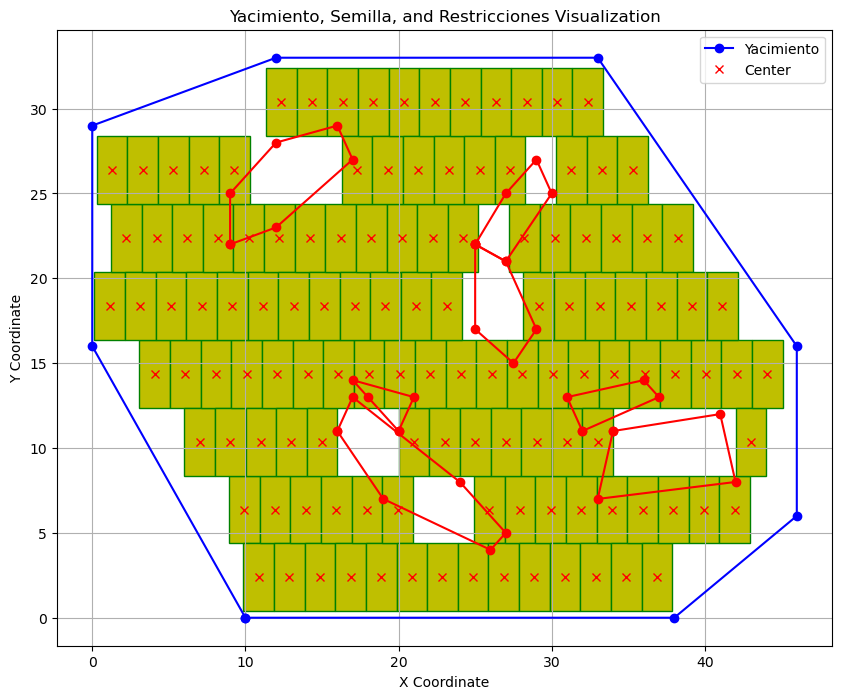

[125]


In [3]:
rectangles = grid_heuristic(polygon, panel_size, restrictions, rand = True)
fun_generacion_mapa(polygon,restrictions,rectangles,panel_size)
len_rectangles = [len(rect) for rect in rectangles]
area = calculate_area(polygon,len_rectangles,panel_size)
print(len_rectangles)

In [4]:
print(area)

0.7815552950371238


In [5]:
best_rectangles = optimize_area(grid_heuristic,polygon,rectangles,panel_size,restrictions,3)

  3%|▎         | 3/100 [00:44<23:48, 14.73s/it]

Se encontro un mejor posicionamiento con un area total de : 0.7878077373974208


 55%|█████▌    | 55/100 [12:17<08:47, 11.72s/it]

Se encontro un mejor posicionamiento con un area total de : 0.7940601797577178


100%|██████████| 100/100 [20:16<00:00, 12.16s/it]


In [10]:
# Corrected path to save the CSV
csv_path = r'C:\Users\valen\OneDrive\Escritorio\Bony\Di tella\TD8FINAL\TD8_ProyectoFinal\solutions\pols2\best_rectangles0.csv'

# Find the maximum length of the lists inside best_rectangles
max_length = max(len(lst) for lst in best_rectangles)

# Save best_rectangles to a CSV file
with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header: Separate 'x' and 'y' for each pair of coordinates
    header = []
    for i in range(len(best_rectangles)):
        header.append(f'x{i}')
        header.append(f'y{i}')
    writer.writerow(header)
    
    # Iterate through each "row" index up to the maximum length
    for i in range(max_length):
        row = []
        for rect_list in best_rectangles:
            if i < len(rect_list):
                row.extend([rect_list[i][0], rect_list[i][1]])  # Add x and y coordinates as floats/ints
            else:
                row.extend([None, None])  # Use None for missing values to avoid quotes
        writer.writerow(row)